<h1><center>Модульная работа 2</center></h1>
<div style='text-align: right; font-weight:700; font-size: 20px;'>Выполнил:</div>


<div style='text-align: right; font-size: 20px'>Егоров Алексей Михайлович:</div>


<div style='text-align: right; font-weight:700; font-size: 20px'>Преподаватель:</div>


<div style='text-align: right; font-size: 20px'>Устинова Регина Алексеевна</div>

In [454]:
import statsmodels.api as sm
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [455]:
#импортируем данные из Таблицы 1
data1 = pd.read_csv('table1.csv', delimiter=';')
data1.drop('t', axis=1, inplace=True)
data1

Y      X1    X2     X3     X4
0   31.2   492.9  37.3   54.7   77.4
1   33.3   528.6  38.1   63.7   80.2
2   35.6   560.3  39.3   69.8   80.4
3   36.4   624.6  37.8   65.9   83.9
4   36.7   666.4  38.4   64.5   85.5
5   38.4   717.8  40.1   70.0   93.7
6   40.4   768.2  38.6   73.2  106.1
7   40.3   843.3  39.8   67.8  104.8
8   41.8   911.6  39.7   79.1  114.0
9   40.4   931.1  52.1   95.4  124.1
10  40.7  1021.5  48.9   94.2  127.6
11  40.1  1165.9  58.3  123.5  142.9
12  42.7  1349.6  57.9  129.9  143.6
13  44.1  1449.4  56.5  117.6  139.2
14  46.7  1575.5  63.7  130.9  165.5
15  50.6  1759.1  61.6  129.8  203.3
16  50.1  1994.2  58.9  128.0  219.6
17  51.7  2258.1  66.4  141.0  221.6
18  52.9  2478.7  70.4  168.2  232.6

<center><h1>Задание 1</h1></center>

<h3>Функция спроса</h3>

In [456]:
Y = data1['Y'] #Прогнозируемая переменная

X1, X2, X3, X4 = data1['X1'], data1['X2'], data1['X3'], data1['X4'] #предикторы

In [142]:
#Модель 1
#для составления уравнения регрессии вида Y = b0*X2^b2
#рассмотрим ln(Y); ln(Y) = ln(b0) + b2*ln(X2)
#соответственно составим регрессионную модель для ln(Y) и ln(X2)
#коэффициент b2 будет коэффициентом при X2 в модели, а коэффициент b0 = e^b0 модели
Xs_model1 = X2.copy()
Xs_model1 = np.log(Xs_model1)
Xs_model1 = sm.add_constant(Xs_model1)
model1 = sm.OLS(np.log(Y), Xs_model1).fit()
b0_model1, b2_model1 = np.exp(model1.params[0]), model1.params[1]
print('Функиця спроса:')
print(f'Y^ = {np.round(b0_model1, 4)} * X2^({np.round(b2_model1, 4)})')
model1.summary2()

Функиця спроса:
Y^ = 4.8439 * X2^(0.5527)


C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_24520\1914936098.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_model1, b2_model1 = np.exp(model1.params[0]), model1.params[1]
C:\Anaconda\envs\py-frac\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.722    
Dependent Variable: Y                AIC:                -41.0765 
Date:               2023-12-12 19:27 BIC:                -39.1876 
No. Observations:   19               Log-Likelihood:     22.538   
Df Model:           1                F-statistic:        47.86    
Df Residuals:       17               Prob (F-statistic): 2.49e-06 
R-squared:          0.738            Scale:              0.0061022
---------------------------------------------------------------------
           Coef.     Std.Err.      t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const      1.5777      0.3105    5.0810    0.0001    0.9226    2.2328
X2         0.5527      0.0799    6.9183    0.0000    0.3842    0.7213
------------------------------------------------------------------
Omnibus:              0.824         Durbin-Watson:           0.780
Prob(Omnibus):        0.662         Jarque-Bera (JB):        0.757
Skew:                 -0.228        Prob(JB):                0.685
Kurtosis:             2.135         Condition No.:           72   
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

Text(0, 0.5, 'Y')

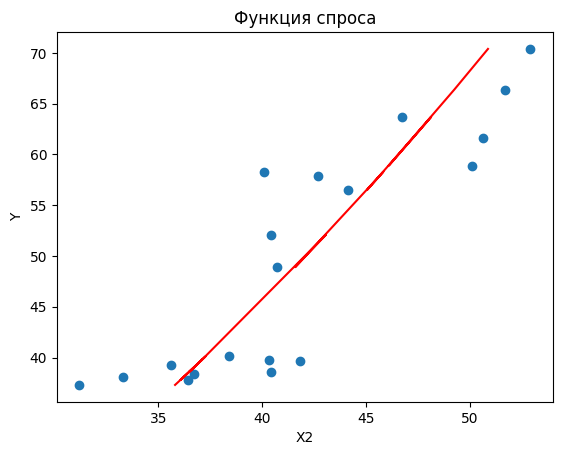

In [457]:
plt.scatter(Y, X2)
plt.plot(b0_model1 * X2**(b2_model1), X2, color='red')
plt.title('Функция спроса')
plt.xlabel('X2')
plt.ylabel('Y')

**Функция спроса** имеет вид $\widehat{Y} = 4.8439 \ast X_2^{0.5527}$. Количество потребления цыплят прямо пропорционально зависит от стоимости одного фунта цыплят (что является сомнительным утверждением). Зафиксируем момент времени, когда стоимость одного фунта курицы была равна x, тогда если стоимость курицы изменилась на $\Delta$x, то количество потребления цыплят увеличится примерно на $4.8439\ \ast  (\sqrt{x + \Delta x} - x)$ или же если стоисмость курицы увеличилась в 2 раза, то количество потребления курицы, согласно модели, увеличится примерно в 1.467 раз
<p></p>
Скорректированная оценка коэфициента детерминации $R^2$ модели равна 0.722, это означает, что регрессионная модель объясняет 72.2% вариации зависимой переменной. Проверим значимость коэффициента детерминации:
Расчетное значение статистики критерия Фишера: F-statistic = 47.86 расчетный уровень значимо-сти Prob (F-statistic) = 2.49 * $10^{-6}$ так как значение Prob (F-statistic) < 0.05, то коэффициент детерминации значим. Среднеквадратичная ошибка составляет 0.0061022

<h3>Функция потребления</h3>

In [458]:
#Модель 2
#Аналогичные рассуждения и для функции потребления
Xs_model2 = X1.copy()
Xs_model2 = np.log(Xs_model2)
Xs_model2 = sm.add_constant(Xs_model2)
model2 = sm.OLS(np.log(Y), Xs_model2).fit()
b0_model2, b1_model2 = np.exp(model2.params[0]), model2.params[1]
print('Функиця потребления:')
print(f'Y^ = {np.round(b0_model2,4)} * X1^({np.round(b1_model2,4)})')
model2.summary2()

Функиця потребления:
Y^ = 5.7316 * X1^(0.2849)


C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_24520\3577746939.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_model2, b1_model2 = np.exp(model2.params[0]), model2.params[1]
C:\Anaconda\envs\py-frac\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.935    
Dependent Variable: Y                AIC:                -68.6468 
Date:               2023-12-13 03:14 BIC:                -66.7579 
No. Observations:   19               Log-Likelihood:     36.323   
Df Model:           1                F-statistic:        259.8    
Df Residuals:       17               Prob (F-statistic): 9.84e-12 
R-squared:          0.939            Scale:              0.0014299
---------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const     1.7460      0.1229    14.2043    0.0000    1.4867    2.0053
X1        0.2849      0.0177    16.1186    0.0000    0.2476    0.3222
------------------------------------------------------------------
Omnibus:              0.699         Durbin-Watson:           0.753
Prob(Omnibus):        0.705         Jarque-Bera (JB):        0.672
Skew:                 -0.381        Prob(JB):                0.715
Kurtosis:             2.484         Condition No.:           101  
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

Text(0, 0.5, 'Y')

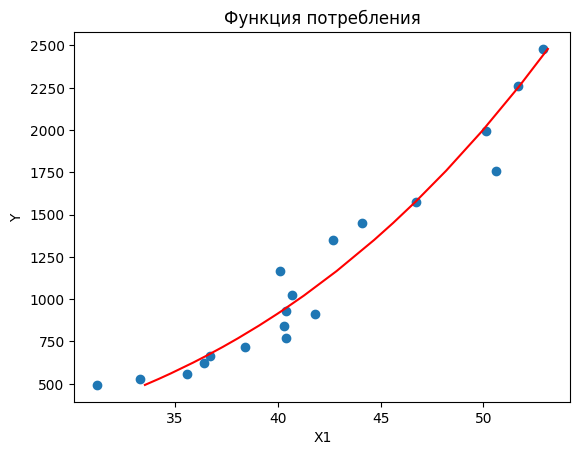

In [145]:
plt.scatter(Y, X1)
plt.plot(b0_model2 * X1**(b1_model2), X1, color='red')
plt.title('Функция потребления')
plt.xlabel('X1')
plt.ylabel('Y')

**Функция потребления** имеет вид $\widehat{Y} = 5.7316 \ast X_1^{0.2849}$. Количество потребления цыплят прямо пропорционально зависит от среднедушевого дохода. Зафиксируем момент времени, когда среднедушевой доход был равнен *x*, тогда если средний доход на душу населения увеличится на *$\Delta$x*, то количество потребления цыплят увеличилось примерно на $5.7316 \ast (\sqrt[4]{x + \Delta x} - x)$. Рассмотрим случай, когда среднедушевой доход увеличится в 2 раза, тогда количество потребления курицы увеличится примерно в 1.218 раз.
<p></p>
Скорректированная оценка коэфициента детерминации $R^2$ модели равна 0.935, это означает, что регрессионная модель объясняет 93.5% вариации зависимой переменной. Проверим значимость коэффициента детерминации:
Расчетное значение статистики критерия Фишера: $F-statistic = 259.8$ расчетный уровень значимо-сти Prob (F-statistic) = $9.84 \ast 10^{-12}$ так как значение Prob (F-statistic) < 0.05, то коэффициент детерминации значим. Среднеквадратичная ошибка составляет 0.0014299
<p></p>
Заметим, что коэффициент детерминации этой модели больше, чем у предыдущей, а среднеквадратичная ошибка - меньше. Можем сделать вывод, что эта модель точнее предыдущей.

<h3>Функция спроса-потребления</h3>

In [459]:
#Модель 3
#для моделей 3 и 4 (больше 1 зависимой переменной) пользуемся свойством логарифма (логарифм произведения равен сумме логарифмов)
#коэффициенты при степенях будут коэффициентами модели, а константу будем потенциировать
Xs_model3 = data1[['X1', 'X2']].copy()
Xs_model3 = np.log(Xs_model3)
Xs_model3 = sm.add_constant(Xs_model3)
model3 = sm.OLS(np.log(Y), Xs_model3).fit()
b0_model3, b1_model3, b2_model3 = np.exp(model3.params[0]), model3.params[1], model3.params[2]
print('Функиця спроса-потребления:')
print(f'Y^ = {np.round(b0_model3,4)} * X1^({np.round(b1_model3,4)}) * X2^({np.round(b2_model3,4)})')
model3.summary2()

Функиця спроса-потребления:
Y^ = 7.5269 * X1^(0.4161) * X2^(-0.3048)


C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_24520\3023619706.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_model3, b1_model3, b2_model3 = np.exp(model3.params[0]), model3.params[1], model3.params[2]
C:\Anaconda\envs\py-frac\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.959     
Dependent Variable: Y                AIC:                -76.7525  
Date:               2023-12-13 03:14 BIC:                -73.9192  
No. Observations:   19               Log-Likelihood:     41.376    
Df Model:           2                F-statistic:        213.7     
Df Residuals:       16               Prob (F-statistic): 2.87e-12  
R-squared:          0.964            Scale:              0.00089256
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const        2.0185     0.1267   15.9370   0.0000    1.7500    2.2870
X1           0.4161     0.0416   10.0113   0.0000    0.3280    0.5043
X2          -0.3048     0.0909   -3.3517   0.0041   -0.4976   -0.1120
-------------------------------------------------------------------
Omnibus:                0.235        Durbin-Watson:           1.566
Prob(Omnibus):          0.889        Jarque-Bera (JB):        0.415
Skew:                   0.166        Prob(JB):                0.812
Kurtosis:               2.356        Condition No.:           170  
===================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors
is correctly specified.
"""

Text(0.5, 0.5, 'X2')

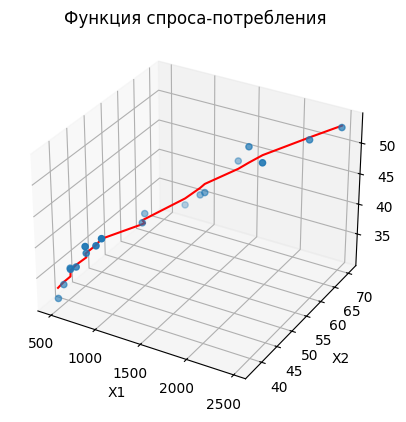

In [147]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, label='parametric curve')
ax.plot(X1, X2, b0_model3 * X1**b1_model3 * X2**b2_model3, color='red')
plt.title('Функция спроса-потребления')
plt.xlabel('X1')
plt.ylabel('X2')

**Функция спроса-потребления** имеет вид $\widehat{Y} = 7.5269 \ast X_1^{0.4161} * X_2^{-0.3048}$. Количество потребления цыплят прямо пропорционально зависит от среднедушевого дохода и обратно пропорционально стоимости одного фунта цыплят. Действительно, с экономиической точки зрения, чем больше цена товара, тем меньше его покупают, но чем больше доход покупателей, тем больше товара они покупают.
<p></p>
Зафиксируем момент времени, когда стоимость одного фунта курицы была равна $x_2$, а среднедушевой доход составлял $x_1$, тогда если среднедушевой доход увеличился на $\Delta x_1$ а стоимость одного фунта цыплят не изменилась, то количество потребления цыплят увеличилось примерно на $7.5269 \ast (\sqrt[5]{(x_1 + \Delta x_1)^2} - x_1) \ast \frac{1}{x{_2^3}}$ Если же стоимость одного фунта цыплят увеличилась на $\Delta x_2$, а среднедушевой доход не изменился, то количество потребления цыплят уменьшилось примерно на $7.5269 \ast \sqrt[5]{x^2} \ast (\frac{1}{x{_2^3}} - (\frac{1}{(x_2 + \Delta x_2)^3})$
<p></p>
Полученную функцию спроса-потребления можно ещё можно проинтерпретировать так: если при постоянной цене на курицу, средний доход на душу населения возрастёт в 2 раза, то количество потребления курицы возрастёт примерно в 1.334 раза, но если при фиксированнов среднедушевом доходе цена на фунт курицы вырастет в 2 раза, то количество потребления уменьшится примерно в 1.235 раз.
<p></p>
Скорректированная оценка коэфициента детерминации $R^2$ модели равна 0.959, это означает, что регрессионная модель объясняет 95.9% вариации зависимой переменной. Проверим значимость коэффициента детерминации:
Расчетное значение статистики критерия Фишера: F-statistic = 213.7 расчетный уровень значимо-сти Prob (F-statistic) = 2.87 * $10^{-12}$ так как значение Prob (F-statistic) < 0.05, то коэффициент детерминации значим. Среднеквадратичная ошибка составляет 0.00089256.
<p></p>
Коэффициент детерминации этой модели больше, чем у двух предыдущих, а среднеквадратичная ошибка - меньше. Можем сделать вывод, что эта модель точнее предыдущих. Также модель выглядит более значимой с экономической точки зрения.

<h3>Функция спроса с учетом цены на товары-заменители</h3>

In [148]:
#Модель 4
Xs_model4 = data1[['X2', 'X3', 'X4']].copy()
Xs_model4 = np.log(Xs_model4)
Xs_model4 = sm.add_constant(Xs_model4)
model4 = sm.OLS(np.log(Y), Xs_model4).fit()
b0_model4, b2_model4, b3_model4, b4_model4 = np.exp(model4.params[0]), model4.params[1], model4.params[2], model4.params[3]
print('Функция спроса с учетом цены на товары-заменители:')
print(f'Y^ = {np.round(b0_model4, 4)} * X2^({np.round(b2_model4,4)}) * X3^({np.round(b3_model4,4)}) * X4^({np.round(b4_model4,4)})')
model4.summary2()

Функция спроса с учетом цены на товары-заменители:
Y^ = 10.1268 * X2^(-0.4875) * X3^(0.2374) * X4^(0.4601)


C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_24520\33822940.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0_model4, b2_model4, b3_model4, b4_model4 = np.exp(model4.params[0]), model4.params[1], model4.params[2], model4.params[3]
C:\Anaconda\envs\py-frac\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.935    
Dependent Variable: Y                AIC:                -67.1206 
Date:               2023-12-12 19:28 BIC:                -63.3429 
No. Observations:   19               Log-Likelihood:     37.560   
Df Model:           3                F-statistic:        87.74    
Df Residuals:       15               Prob (F-statistic): 9.73e-10 
R-squared:          0.946            Scale:              0.0014227
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const       2.3152     0.2215   10.4501   0.0000    1.8430    2.7874
X2         -0.4875     0.2110   -2.3102   0.0355   -0.9372   -0.0377
X3          0.2374     0.1556    1.5256   0.1479   -0.0943    0.5691
X4          0.4601     0.0753    6.1120   0.0000    0.2996    0.6205
------------------------------------------------------------------
Omnibus:              2.117         Durbin-Watson:           1.235
Prob(Omnibus):        0.347         Jarque-Bera (JB):        1.739
Skew:                 -0.641        Prob(JB):                0.419
Kurtosis:             2.255         Condition No.:           288  
==================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the
errors is correctly specified.
"""

**Функция спроса с учетом цены на товары-заменители** имеет вид $\widehat{Y} = 10.1268 \ast X_2^{-0.4875} \ast X_3^{0.2374} \ast X_4^{0.4601}$.Согласно построенной модели, количество потребления цыплят обратно пропорционально зависит от стоимости одного фунта курицы, но прямо пропорционально зависит от стоимости одного фунта свинины и говядины. Что говорит о том, что чем дороже товары-заменители, тем больше покупают курицу.
<p></p>
Пусть цены на говядину и свинину постоянны, тогда при увеличении цены на фунт курицы количество потребления курицы уменьшится примерно в 1.402. Если же стоимость фунта цыплят постоянна, то при увеличении цены фунта свинины при фиксированной цене на фунт говядины и наоборот количество потребления курицы увеличится примерно в 1.179 и 1.376 раза соответственно. Можем сделать вывод, что количество потребления курицы более чувствительно к цене фунта говядины, нежели свинины.
<p></p>
Скорректированная оценка коэфициента детерминации $R^2$ модели равна 0.935, это означает, что регрессионная модель объясняет 93.5% вариации зависимой переменной. Проверим значимость коэффициента детерминации:
Расчетное значение статистики критерия Фишера: F-statistic = 87.74 расчетный уровень значимо-сти Prob (F-statistic) = $9.73 \ast 10^{-10}$ так как значение Prob (F-statistic) < 0.05, то коэффициент детерминации значим. Среднеквадратичная ошибка составляет 0.0014227
<p></p>
С добавлением в модель новых переменных коэффициент детерминации уменьшился, а среднеквадратичная ошибка уеличилась, что говорит о уменьшении точности модели.

array([[<Axes: title={'center': 'X1'}>],
       [<Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>]], dtype=object)

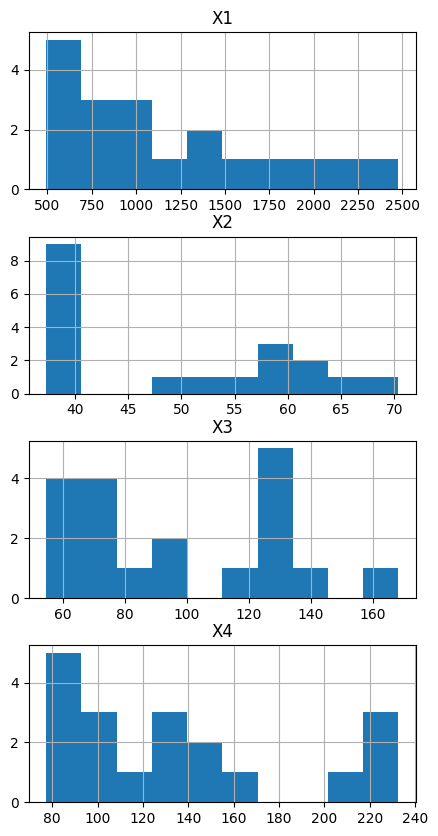

In [149]:
#Построим гистограммы распределения предикторов
data1[['X1', 'X2', 'X3', 'X4']].hist(layout=(4,1),figsize=(5, 10))

In [150]:
#Проверим результат с помощью теста Шапиро-Уилка
X1_shapiro = stats.shapiro(data1['X1'])
print(f'X1:\t{X1_shapiro}')
X2_shapiro = stats.shapiro(data1['X2'])
print(f'X2:\t{X2_shapiro}')
X3_shapiro = stats.shapiro(data1['X3'])
print(f'X3:\t{X3_shapiro}')
X4_shapiro = stats.shapiro(data1['X4'])
print(f'X4:\t{X4_shapiro}')

X1:	ShapiroResult(statistic=0.896443247795105, pvalue=0.04197002574801445)
X2:	ShapiroResult(statistic=0.8548540472984314, pvalue=0.008054640144109726)
X3:	ShapiroResult(statistic=0.89530348777771, pvalue=0.04003702849149704)
X4:	ShapiroResult(statistic=0.8776261210441589, pvalue=0.01952611841261387)


Проверим на нормальность распределение каждого из предикторов. На гистограммах выше можно предположить отсутствие нормальности для каждой зависимой переменной.
<p></p>
Проверим наше предположение, применив тест Шапиро-Уилка. Из полученных результатов можем сделать вывод, что, действительно, ни один из предикторов не имеет нормального распределения на уровне значимости 0.05. Поэтому выполним преобразование Бокса-Кокса для каждой из зависимых переменных.

In [151]:
#выполним преобразование Бокса-Кокса для переменных X1, X2, X3, X4
X1_boxcox = stats.boxcox(X1)
X2_boxcox = stats.boxcox(X2)
X3_boxcox = stats.boxcox(X3)
X4_boxcox = stats.boxcox(X4)

Проверим нормальность распределения зависимых параметров после преобразования Бокса-Кокса:

In [152]:
#Проверим нормальность согласно тесту Шапиро-Уилка
print(f'X1:\t{stats.shapiro(X1_boxcox[:-1])}')
print(f'X2:\t{stats.shapiro(X2_boxcox[:-1])}')
print(f'X3:\t{stats.shapiro(X3_boxcox[:-1])}')
print(f'X4:\t{stats.shapiro(X4_boxcox[:-1])}')

X1:	ShapiroResult(statistic=0.9598411917686462, pvalue=0.569256603717804)
X2:	ShapiroResult(statistic=0.8407939672470093, pvalue=0.004768925718963146)
X3:	ShapiroResult(statistic=0.9084967374801636, pvalue=0.06947548687458038)
X4:	ShapiroResult(statistic=0.9304439425468445, pvalue=0.17648252844810486)


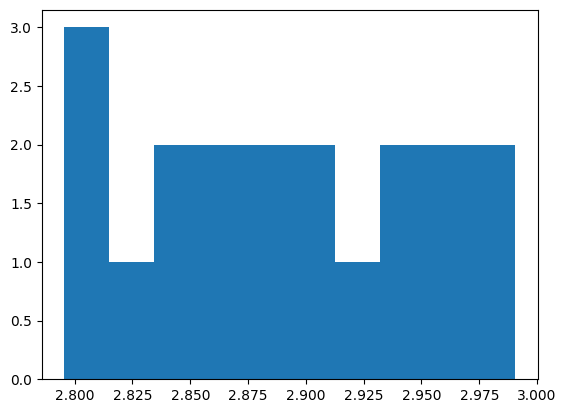

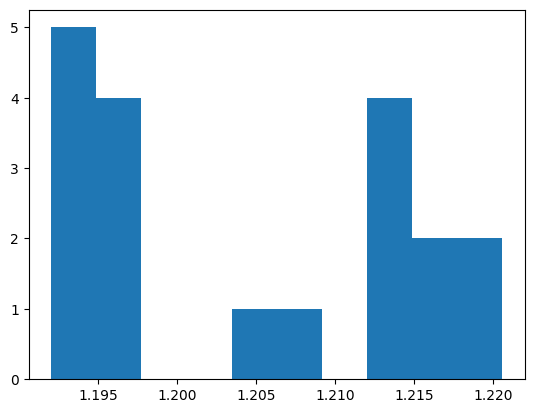

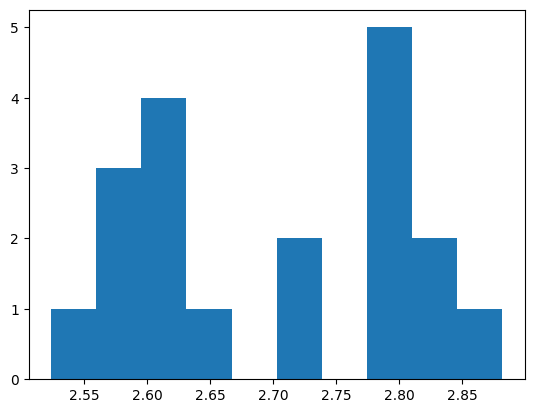

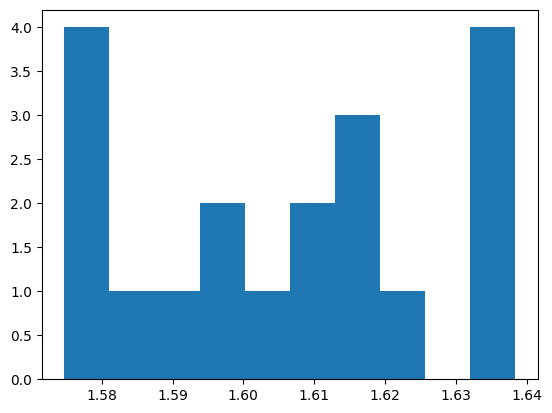

In [115]:
#Рассмотрим гистограммы распределения данных после преобразования Бокса-Кокса
plt.hist(X1_boxcox[:-1][0])
plt.show()
plt.hist(X2_boxcox[:-1][0])
plt.show()
plt.hist(X3_boxcox[:-1][0])
plt.show()
plt.hist(X4_boxcox[:-1][0])
plt.show()

Преобразование Бокса-Кокса возвожно только для положительных значений предикторов, но все значения предикторов были положительны.
<p></p>
Видим, что теперь можем принять нормальность распределения значений среднедушевого дохода, стоимость одного фунта свинины и говядины соответственно на уровне значимости 0.05

In [153]:
#Проведем тест Манна-Уитни
mann_whitney = stats.mannwhitneyu(data1['X3'], data1['X4'])
mann_whitney

MannwhitneyuResult(statistic=102.0, pvalue=0.02277486537233766)

Тест Манна-Уитни указывает на статистически значимое различие между распределениями цен на свинину и цен на говядину

In [154]:
#Применим критерий Флигнера-Клипера для X2 и X3
fligner = stats.fligner(data1['X2'], data1['X3'])
#Применим критерий Стьюдента для этих данных с учетом полученных результатов
ttest = stats.ttest_ind(data1['X2'], data1['X3'], equal_var=(fligner.pvalue > 0.05))
print(fligner)
print(ttest)

FlignerResult(statistic=16.797459660607196, pvalue=4.158894013328987e-05)
TtestResult(statistic=-5.937606839472742, pvalue=5.474644516999182e-06, df=22.16007384648827)


По результатам теста Флигнера-Клипера видим, что pvalue мало (<0.01), а значит дисперсии стоимости фунта цыплят и стоимости фунта свинины сильно различаются.
T-тест Стьюдента показал значительное различие в средних значениях X2 и X3 (pvalue < 0.01)

<center><h1>Задание 2</h1></center>

In [173]:
#импортируем данные из Таблицы 2
data2 = pd.read_csv('table2.csv', delimiter=';')
Y = data2['profitability']
X = data2[['staff', 'projects', 'adverts']]

In [188]:
#Разбиваем выборку данные для обучения и для тестирования
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

Построим регрессионные модели с помощью полиномов степени от 1 до 20 и посмотрим точность данных моделей на обучающей и тестовой выборках.

In [263]:
results = []

for degree in range(1, 21):
    #создание полиномов
    polynoms = PolynomialFeatures(degree)
    x_train_polynoms = polynoms.fit_transform(x_train)
    x_test_polynoms = polynoms.transform(x_test)
    #обучение модели
    polynom_model = LinearRegression().fit(x_train_polynoms, y_train)

    #вычисление основных характеристик модели
    R2_test = polynom_model.score(x_test_polynoms, y_test)
    R2_train = polynom_model.score(x_train_polynoms, y_train)
    
    y_predicted_test = polynom_model.predict(x_test_polynoms)
    y_predicted_train = polynom_model.predict(x_train_polynoms)
    
    mse_train = mean_squared_error(y_train, y_predicted_train)
    mse_test = mean_squared_error(y_test, y_predicted_test)

    results.append([degree, R2_test, R2_train, mse_train, mse_test])

В результате были посчитаны коэффициент детерминации $R^2$ на обучающей выборке, а также среднеквадратичная ошибка моделей на обучающей (mse_train) и тестовой (mse_train) выборках соответственно.

In [269]:
for result in results:
    print('\033[1m' + f"Степень полинома: {result[0]}" + '\033[0m')
    print(f"Коэффициент детерминации тест.: {result[1]}")
    print(f"Коэффициент детерминации трен.: {result[2]}")
    print(f"mse_train:{result[3]}")
    print(f"mse_test: {result[4]}\n")

Степень полинома: 1
Коэффициент детерминации тест.: 0.6159766418494587
Коэффициент детерминации трен.: 0.8023882254499285
mse_train:51.40901129497986
mse_test: 101.89475295529085

Степень полинома: 2
Коэффициент детерминации тест.: 0.8976844312774457
Коэффициент детерминации трен.: 0.9134491010100139
mse_train:22.51635133532708
mse_test: 27.147878839124875

Степень полинома: 3
Коэффициент детерминации тест.: 0.37792936874186467
Коэффициент детерминации трен.: 0.9722761131925364
mse_train:7.212412384184657
mse_test: 165.05697361237497

Степень полинома: 4
Коэффициент детерминации тест.: -102.56825477279875
Коэффициент детерминации трен.: 0.4235751534714065
mse_train:149.95782267208418
mse_test: 27480.260015715074

Степень полинома: 5
Коэффициент детерминации тест.: -227.76597698260287
Коэффициент детерминации трен.: 1.0
mse_train:1.5719550693211443e-20
mse_test: 60699.56999876106

Степень полинома: 6
Коэффициент детерминации тест.: -148.42862365660196
Коэффициент детерминации трен.: 1.0

Увеличивая порядок полинома, мы все точнее и точнее будем описывать экспериментальные зависимости (как мы видим, на обучающей выборке среднеквадратичная ошибка _mse_train_ стремится к 0, а коэффициент детерминации $R^2$ стремится к 1). Но такие модели будут показывать плохие результаты на проверочных данных (среднеквадратичная ошибка на тестовой выборке _mse_test_ сильно возрастает, также возрастает модуль коэффициента детерминации $R^2$). Видим, что переобучение модели серьезно влияет на показываемые резульаты.
<p></p>
Наиболее оптимальной себя показала регрессионная модель в форме многочлена 2 степени. Она имеет наибольший коэффициент детерминации $R^2$ на тестовой выборке

<center><h1>Задание 3</h1></center>

In [325]:
#Подготовка данных для дальнейшей работы
data3 = pd.read_csv('table3.csv', delimiter=';')
data3.columns = data3.iloc[1,:]
data3 = data3.iloc[2:, 1:].astype(float)
data3

1     x1     x2      x3      x4     x5     x6      x7     x8    x9      x10  \
2    0.0  60.96    2.68  186.81   0.67   4.02   45.11   5.93  0.67   705.98   
3    0.0  55.02    7.42   11.34   2.18   4.36   89.58   3.29  1.31   568.75   
4    0.0  69.08   51.50   56.98  23.53  28.41  129.33  16.78  9.92   806.07   
5    0.0  53.54   64.43   59.06   1.34   2.68   86.71   9.09  2.68   675.82   
6    0.0  61.61   56.86   96.73  19.57  20.31   88.33  13.87  1.85   705.08   
..   ...    ...     ...     ...    ...    ...     ...    ...   ...      ...   
437  0.0  78.22  128.12  143.61   1.89   6.24   53.79   9.40  7.94   736.24   
438  0.0  73.79    1.91    3.83   6.70   4.78   13.76   6.20  0.96  1182.20   
439  0.0  72.16   26.44   19.04   4.23  10.58    0.00   0.00  4.23   279.09   
440  0.0  88.00   16.65   19.49   6.38   9.21  296.02  17.94  0.00  1988.55   
441  0.0  76.26    0.00   12.67   0.00   0.67    0.00   0.53  0.00  2073.15   

1     x11    x12    x13     x14  
2     0.0  42.02   2.68  100.00  
3     2.0  29.96   4.72  100.00  
4    18.0  29.21  11.24   41.70  
5     0.0  21.33   8.51   32.17  
6     6.0  18.79   3.14   74.96  
..    ...    ...    ...     ...  
437   4.0  44.48   3.87   83.96  
438   0.0  33.59   0.39  100.00  
439   2.0  11.15   6.06    0.00  
440  13.0  44.89  37.32   17.90  
441   0.0  53.16   5.81    0.00  

[440 rows x 14 columns]

Используем метод главных компонент (PCA) для уменьшения размерности данных.

In [311]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [326]:
data3.describe()

1              x1          x2           x3            x4          x5  \
count  440.000000  440.000000   440.000000    440.000000  440.000000   
mean     0.095455   68.378932   177.743205    238.637091   19.351727   
std      0.294176   12.064899   623.124934    865.264831   31.040787   
min      0.000000    0.000000     0.000000      0.000000    0.000000   
25%      0.000000   61.420000    14.690000     25.785000    4.875000   
50%      0.000000   68.750000    43.285000     70.655000   10.560000   
75%      0.000000   75.315000   112.897500    167.460000   21.280000   
max      1.000000   98.000000  7351.080000  11675.680000  279.070000   

1              x6           x7          x8          x9          x10  \
count  440.000000   440.000000  440.000000  440.000000   440.000000   
mean    26.943773   187.548159   13.066136    4.760273  1218.938477   
std     39.419942   329.457802    6.786782    6.874771   921.505332   
min      0.000000     0.000000    0.000000    0.000000     0.000000   
25%      7.827500    46.505000    8.682500    0.650000   632.545000   
50%     16.345000    91.610000   12.215000    2.715000   974.815000   
75%     30.552500   186.202500   16.922500    6.172500  1462.902500   
max    348.530000  3185.780000   48.070000   54.770000  6145.710000   

1              x11         x12         x13         x14  
count   440.000000  440.000000  440.000000  440.000000  
mean     61.122727   35.729114    8.235318   62.521591  
std     224.585446   14.845077    8.196771   31.806726  
min       0.000000    0.000000    0.000000    0.000000  
25%       1.000000   25.110000    3.360000   40.205000  
50%       8.000000   34.530000    5.320000   71.920000  
75%      29.000000   45.270000   10.037500   89.795000  
max    3096.000000   82.720000   55.680000  100.000000

Рассмотрим распределение параметров $(x1, ..., x14)$

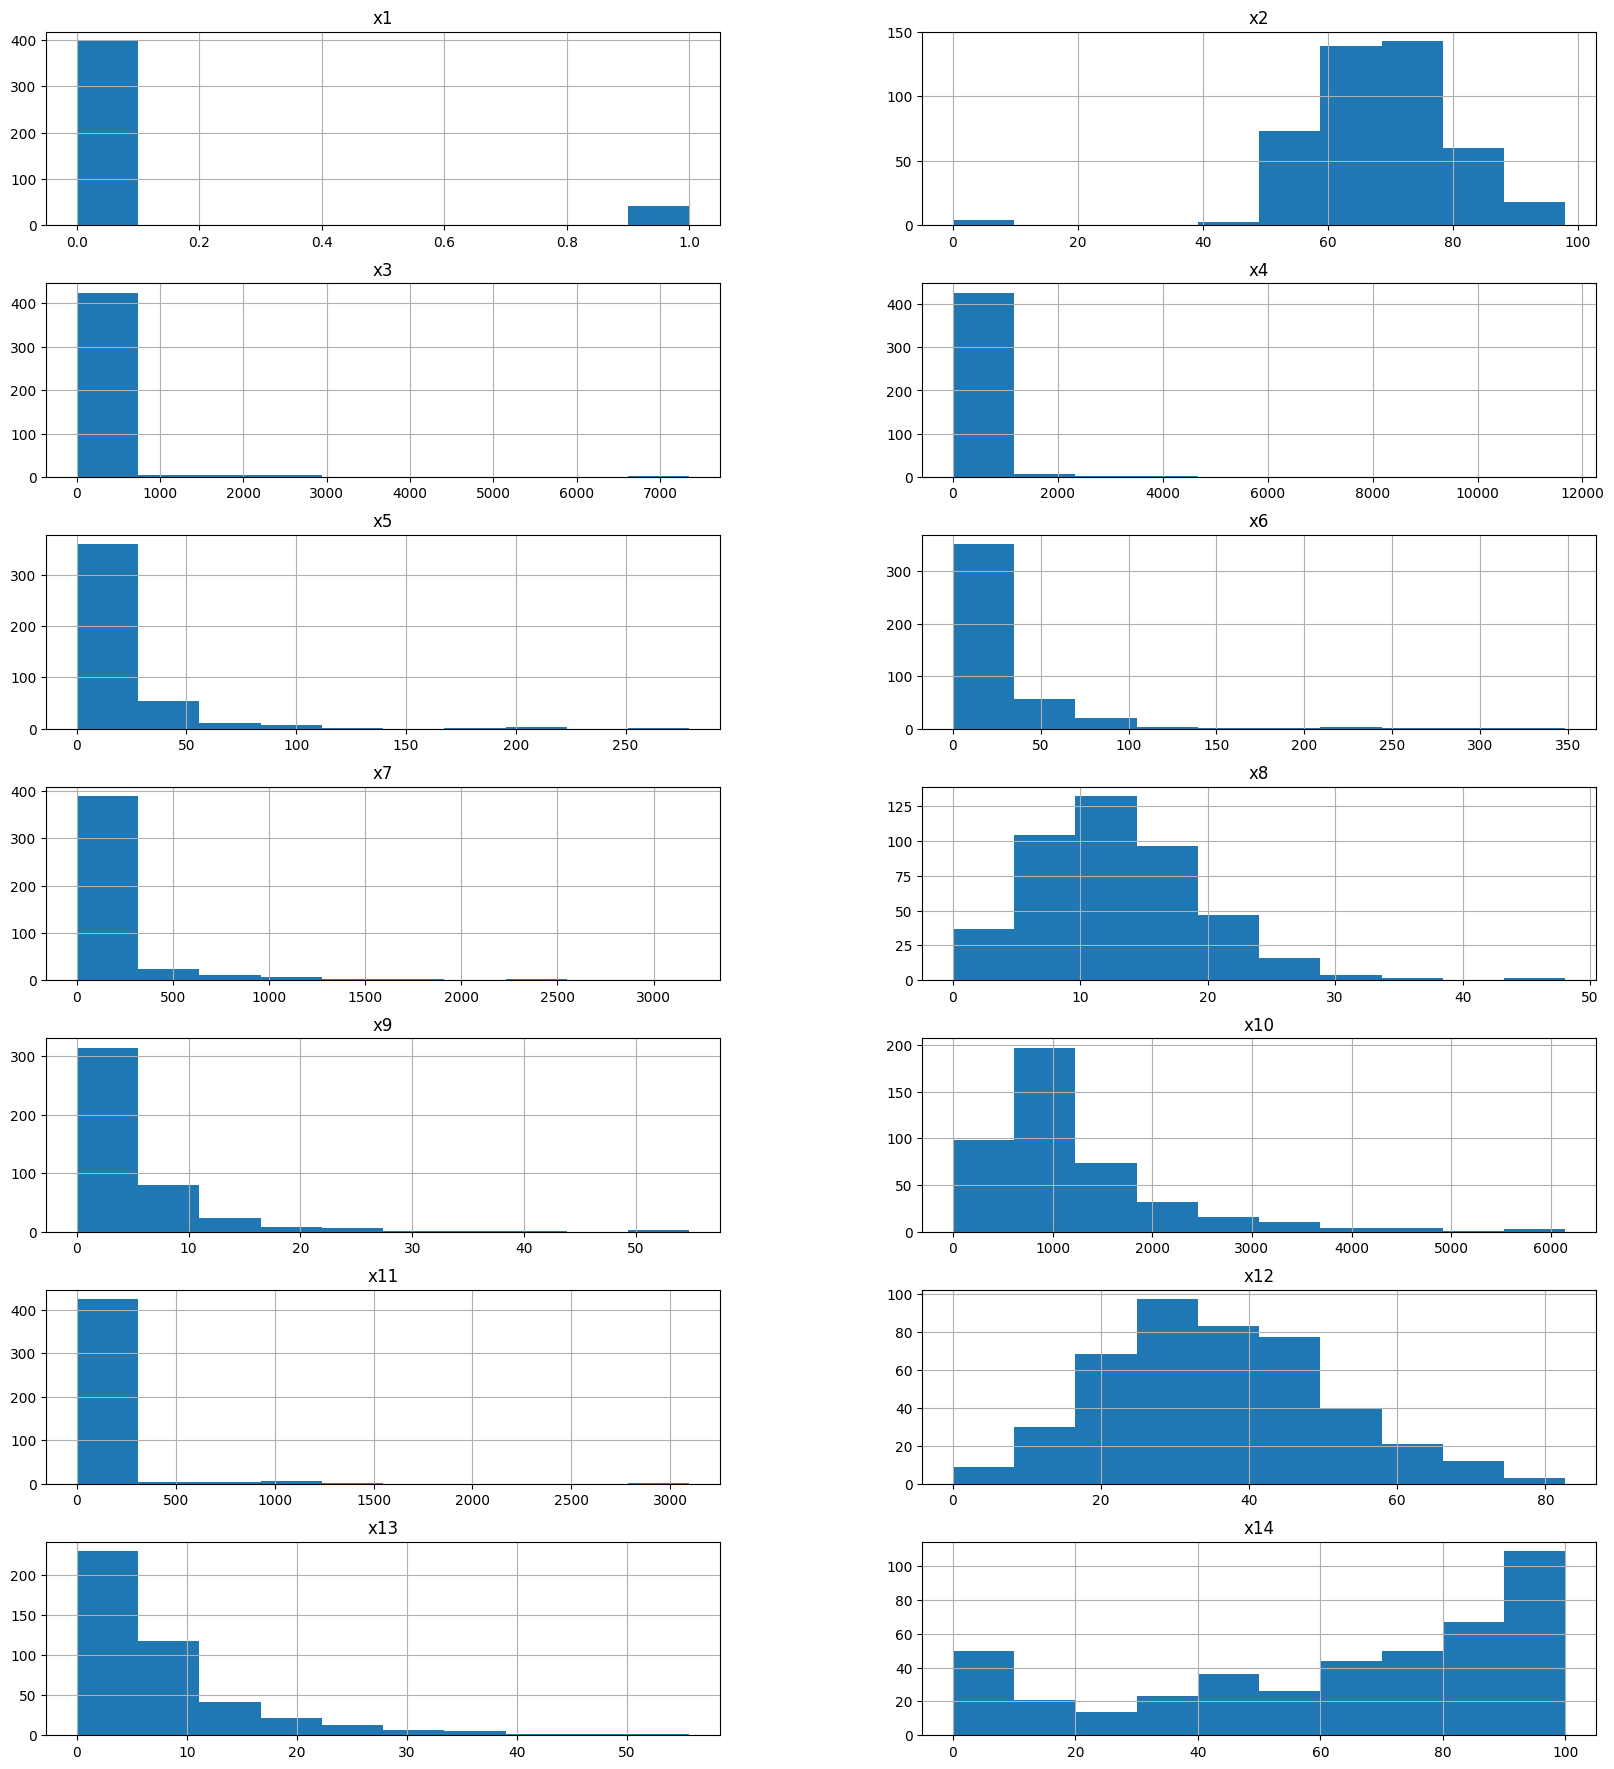

In [338]:
_ = data3.hist(layout=(14, 2), figsize=(20,45))

Стандартизуем данные.

In [355]:
cols = data3.columns
data3_scaled = StandardScaler().fit_transform(data3) 
data3_scaled =pd.DataFrame(data3_scaled,columns=cols)
data3_scaled.describe()

1              x1            x2            x3            x4            x5  \
count  440.000000  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02   
mean     0.000000 -6.378736e-16  8.074349e-18 -1.614870e-17 -4.844610e-17   
std      1.001138  1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00   
min     -0.324850 -5.674044e+00 -2.855696e-01 -2.761105e-01 -6.241387e-01   
25%     -0.324850 -5.774481e-01 -2.619680e-01 -2.462765e-01 -4.669085e-01   
50%     -0.324850  3.079102e-02 -2.160261e-01 -1.943605e-01 -2.835539e-01   
75%     -0.324850  5.755509e-01 -1.041838e-01 -8.235411e-02  6.219133e-02   
max      3.078342  2.457939e+00  1.152498e+01  1.323301e+01  8.376525e+00   

1                x6            x7            x8            x9           x10  \
count  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02   
mean   1.614870e-17 -4.844610e-17 -4.844610e-17  4.844610e-17 -1.130409e-16   
std    1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00   
min   -6.842842e-01 -5.699111e-01 -1.927425e+00 -6.932146e-01 -1.324274e+00   
25%   -4.854911e-01 -4.285942e-01 -6.466432e-01 -5.985584e-01 -6.370674e-01   
50%   -2.691744e-01 -2.915316e-01 -1.255537e-01 -2.978428e-01 -2.652197e-01   
75%    9.164993e-02 -4.089115e-03  5.688636e-01  2.056556e-01  2.650465e-01   
max    8.167244e+00  9.110863e+00  5.163524e+00  7.282665e+00  5.352524e+00   

1               x11           x12           x13           x14  
count  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02  
mean  -1.614870e-17  5.490558e-16  4.844610e-17 -8.074349e-17  
std    1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00  
min   -2.724678e-01 -2.409539e+00 -1.005846e+00 -1.967910e+00  
25%   -2.680101e-01 -7.161432e-01 -5.954623e-01 -7.024299e-01  
50%   -2.368061e-01 -8.086712e-02 -3.560715e-01  2.958213e-01  
75%   -1.431940e-01  6.434286e-01  2.201151e-01  8.584491e-01  
max    1.352862e+01  3.169022e+00  5.794805e+00  1.179658e+00

В масштабированных данных средние значения функций сосредоточены вокруг 0, а дисперсия - это единичная дисперсия, распределения значений остаются такими же.

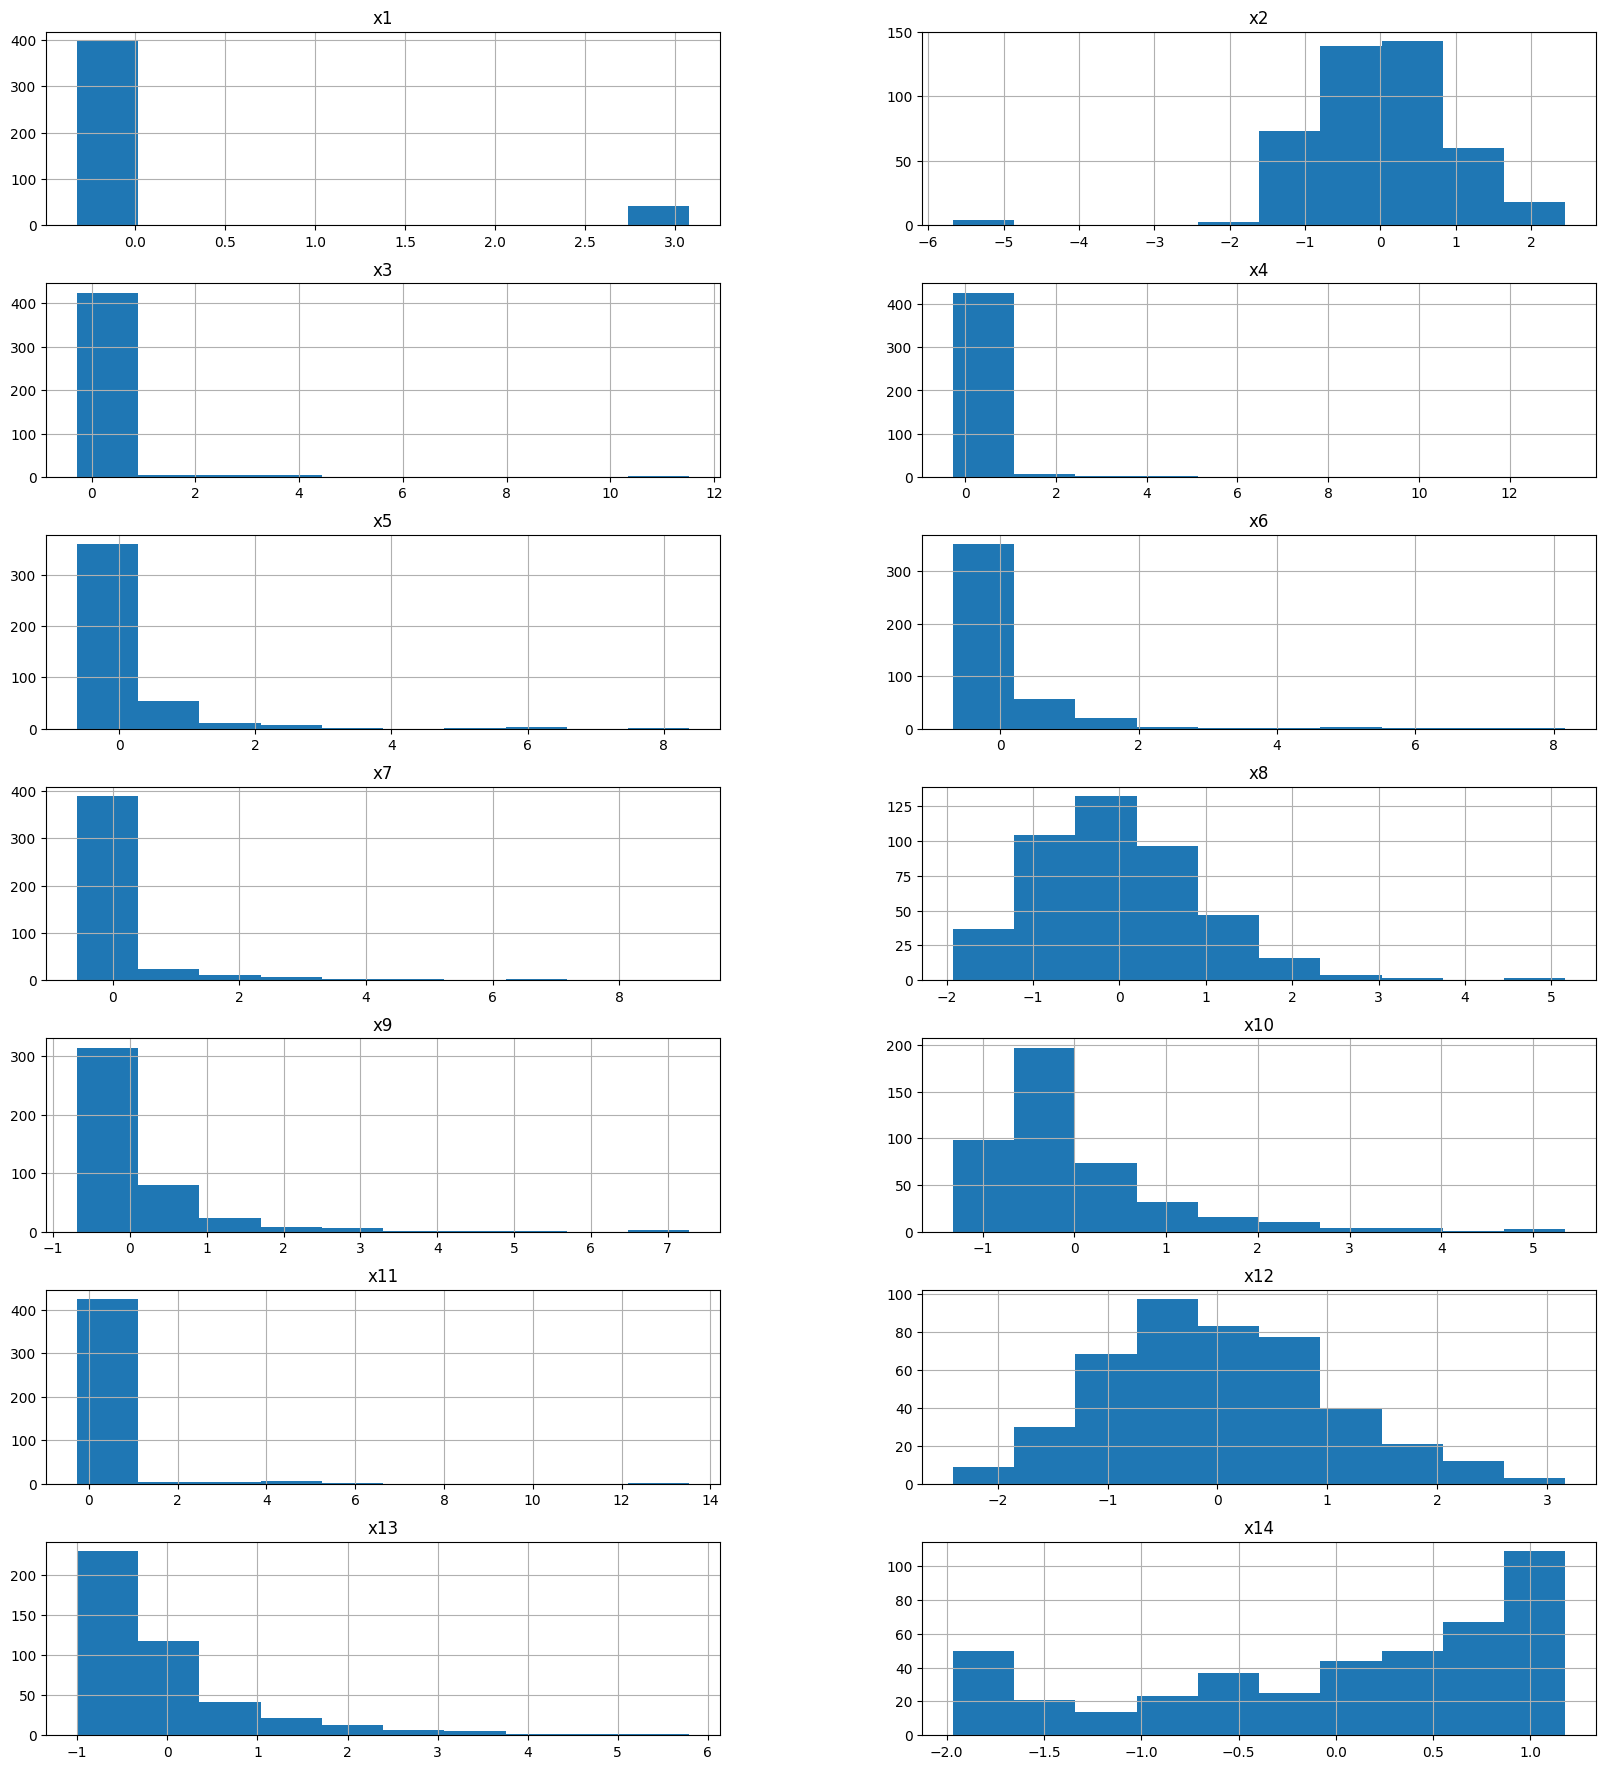

In [351]:
_ = data3_scaled.hist(layout=(14, 2), figsize=(20,45))

In [382]:
#найдем минимальное оптимальное количество компонент для сохранения 75% первоначальной информации
evr = 0
components_number = 0
while evr <= 0.75:
    components_number += 1
    pca = PCA(n_components = components_number)
    pca_model = pca.fit(data3_scaled)
    evr = np.sum(pca_model.explained_variance_ratio_)
    
print(f"Количество компонент: {components_number}\t Кумулятивный процент объяснённой дисперсии: {np.round(evr * 100, 3)}%")
print(f"Проценты дисперсий набора данны, объяснённых главными компонентами: {np.round(pca_model.explained_variance_ratio_ * 100, 3)}")

Количество компонент: 5	 Кумулятивный процент объяснённой дисперсии: 77.929%
Проценты дисперсий набора данны, объяснённых главными компонентами: [41.344 14.185  9.351  6.632  6.416]


Для сохранения 75% первоначальной информации необходимо использовать 5 главных компонент.
<p></p>
Первый главный компонент объясняет 41.344%, второй 14.185%, третий 9.315%, четвертый 6.632%, пятый 6.416% дисперсии исходного набора данных.

In [383]:
#Формулы зависимости этих пяти главных компонент от первоначальных данных
num = 1
for comp in pca_model.components_:
    print('\033[1m' + f"Формула зависимости {num} компонента:" + '\033[0m')
    x = 1
    print('1 = ', end='')
    for coeff in comp:
        if x == 14:
            print(f"x{x} * {np.round(coeff,3)}", end='')
        else:
            print(f"x{x} * {np.round(coeff,3)} + ", end='')
        x += 1
    num += 1
    print('\n')

Формула зависимости 1 компонента:
1 = x1 * 0.286 + x2 * 0.131 + x3 * 0.341 + x4 * 0.329 + x5 * 0.378 + x6 * 0.385 + x7 * 0.322 + x8 * 0.202 + x9 * 0.155 + x10 * 0.183 + x11 * 0.281 + x12 * 0.099 + x13 * 0.308 + x14 * 0.027

Формула зависимости 2 компонента:
1 = x1 * -0.025 + x2 * -0.286 + x3 * 0.22 + x4 * 0.207 + x5 * 0.109 + x6 * 0.085 + x7 * -0.137 + x8 * -0.161 + x9 * 0.161 + x10 * -0.499 + x11 * 0.092 + x12 * -0.594 + x13 * 0.039 + x14 * -0.353

Формула зависимости 3 компонента:
1 = x1 * 0.007 + x2 * -0.552 + x3 * -0.068 + x4 * -0.084 + x5 * -0.072 + x6 * -0.038 + x7 * 0.193 + x8 * 0.355 + x9 * 0.346 + x10 * -0.21 + x11 * -0.186 + x12 * -0.013 + x13 * 0.17 + x14 * 0.535

Формула зависимости 4 компонента:
1 = x1 * -0.394 + x2 * 0.089 + x3 * 0.258 + x4 * 0.195 + x5 * 0.065 + x6 * 0.003 + x7 * -0.384 + x8 * 0.074 + x9 * 0.514 + x10 * 0.023 + x11 * 0.189 + x12 * 0.252 + x13 * -0.436 + x14 * 0.146

Формула зависимости 5 компонента:
1 = x1 * -0.282 + x2 * -0.259 + x3 * 0.314 + x4 * 0.34 

<center><h1>Задание 4</h1></center>

In [387]:
#загружаем данные
data4 = pd.read_csv('table4.csv', delimiter=';')
data4

target  age  educ  work_exp  interest  coffee  boss_educ  passport  \
0         0   50     4        27         8     1.3          1         0   
1         0   30     3        10         0     0.0          6         1   
2         0   43     3        22         7     1.9          6         1   
3         0   58     3        31         7     2.0          4         0   
4         1   40     3        23         7     0.0          6         1   
..      ...  ...   ...       ...       ...     ...        ...       ...   
979       0   32     1         8         3     1.3          4         0   
980       0   52     3        34         6     1.3          5         0   
981       0   57     3        35         9     2.0          1         0   
982       0   32     2        10         7     0.0          3         0   
983       1   35     3        11         1     0.0          5         1   

     green  floor  children  climate  offhour  dist  salary  heigh  lunch  
0        2      3         2        0        0  10.6       1    176    226  
1        2      3         0        0        0  11.5       0    186    226  
2        1      5         0        3        0  12.8       1    166    238  
3        3      3         1        1        0  15.2       1    180    216  
4        3      2         0        0        0  16.1       1    180    286  
..     ...    ...       ...      ...      ...   ...     ...    ...    ...  
979      3      6         1        1        1  10.1       1    169    227  
980      2      2         2        2        0  10.4       0    184    299  
981      1      6         3        4        0   9.8       0    167    299  
982      4      6         0        3        1  12.6       1    182    295  
983      1      5         3        1        1  16.6       1    161    201  

[984 rows x 17 columns]

In [438]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

<center><h3>Отбор переменных, включаемых в модель</h3></center>

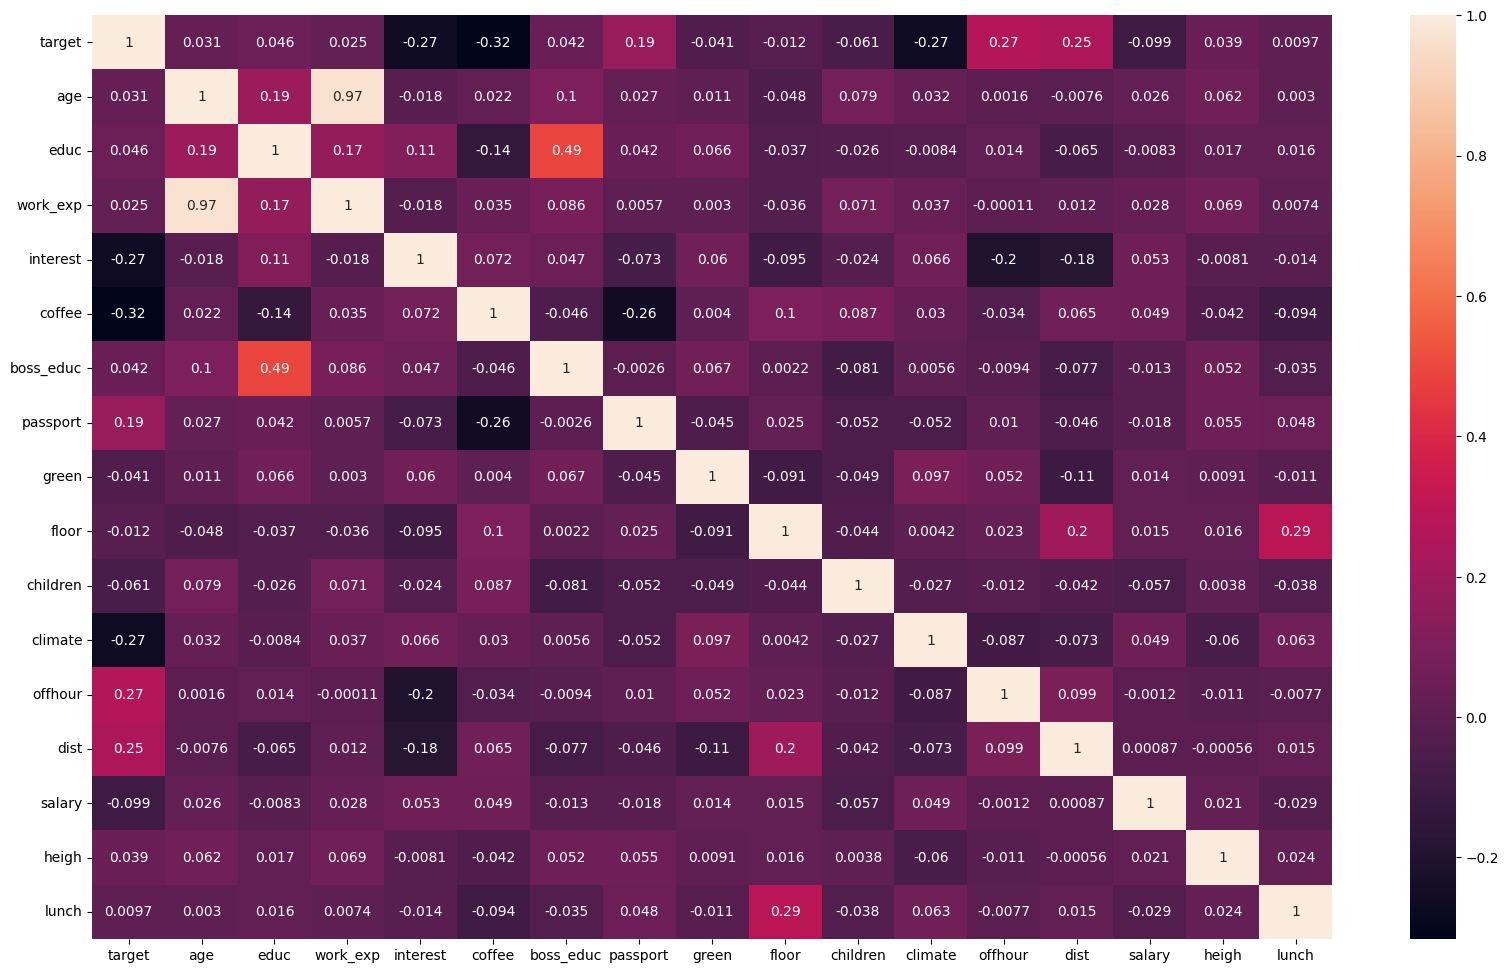

In [389]:
#построим матрицу корреляции между признаками
plt.figure(figsize=(20, 12))
_ = sns.heatmap(data4.corr(), annot=True)

In [394]:
#проверим мультиколлинеарность признаков с помощью vif
data_without_explained = data4.copy()
data_without_explained.drop("target", axis=1, inplace=True)

x_vif = add_constant(data_without_explained)  
vif = pd.Series([variance_inflation_factor(x_vif.values, i)   
               for i in range(x_vif.shape[1])],   
              index=x_vif.columns)  
vif

const        575.795501
age           15.655842
educ           1.404259
work_exp      15.528424
interest       1.111609
coffee         1.144450
boss_educ      1.341012
passport       1.094002
green          1.043336
floor          1.182830
children       1.038550
climate        1.039630
offhour        1.060323
dist           1.108234
salary         1.014207
heigh          1.018251
lunch          1.125074
dtype: float64

1. Общие рассуждения
    * Из логических оображений в дальнейшем анализе не будем использовать признаки роста сотрудника и этажа офиса
    * В модель **должны** быть включены переменные оценки интереса сотрудника к работе, уровень удовлетворённости сотрудника  рабочей атмосферой и заработной платой, так как без сомнений являются ключевыим в удержании сотрудника
2. Анализ матрицы корреляции и vif
    * Опыт работы и возраст сотрудника имеют сильную зависимость _(действительно, чем старше человек, тем больше его стаж)_, поэтому из этих признаков мы возмём один: опыт работы, так как это более важная в дальнейшей интерпретации переменная. 
    * Практически аналогичная ситуация обстоит с образованием сотрудников и образованием руководителя, _так как эти две категории сотрудников были наняты при похожих условиях работы_. Поэтому в качестве используемого параметра модели возьмём уровень образования сотрудника, т. к. прогнозируем увольнение людей именно этой группы работников.
    * В построении модели будем рассматривать среднее количество чашек кофе, выпиваемых сотрудником за рабочий день, так как прослеживается взаимосвязь этого признака с целевой переменной


В итоговую модель я включу: 
1. уровень удовлетворённости сотрудника рабочей атмосферой
2. уровень удовлетворённости сотрудника заработной платой 
3. опыт работы
4. уровень образования сотрудника
5. оценка сотрудником интереса к работе 
6. наличие загранпаспорта у сотрудника
7. степень озеленения офиса 
8. количество детей у сотрудника
9. наличие переработок 
10. расстояние до работы
11. среднее количество чашек кофе, выпиваемых сотрудником за рабочий день

In [436]:
#построение модели
X = data4[['climate','salary','work_exp', 'educ','interest', 'passport','green','children', 'offhour', 'dist', 'coffee']]
Y = data4['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(x_train, y_train)

#интерпретация модели
print(classification_report(y_test, y_pred_logistic))

# class_report = classification_report(y_test, y_pred_logistic)

# conf_matrix


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       199
           1       0.69      0.57      0.62        97

    accuracy                           0.77       296
   macro avg       0.75      0.72      0.73       296
weighted avg       0.77      0.77      0.77       296



Проанализируем результаты построенной модели логистической регрессии на случайной обучающей выборке:

**(класс 0 - сотрудник не уволится, класс 1 - сотрудник уволится)**
<p></p>

* Как одна из метрик качества модели может быть рассмотрена точность определения сотрудников _(отношение количества правильно определенных к классу 0 сотрудников к неправильно определенных в класс 1)_, принадлежащих классу 0  составляет 0.81, это означает, что процент доверия к решению модели, что сотрудник не уволится  81%, что является показателем точности модели.
 * Точность определения сотрудников, которые уволятся равна 0.69, что не является столь хорошим показателем, но всё ещё является приемлимым значением.
 * Ещё одна метрика - процент правильно определенных сотрудников _(количество правильно опреденных в класс 0 сотрудников к количеству всех сотрудников класса 0)_, относящихся к классу 0 равен 84%
 * Модель правильно предсказывает 62% процента сотрудников, которые не собираются увольняться
 * Общая точность модели равна 0.77, что является достаточно хорошим показателем.
 
<p></p>
Задача логистической регрессии состоит в том, чтобы правильно идентифицировать сотрудников, которые не собираются увольняться, а значит, обратим внимание больше на recall 0 (доля правильных прогнозов элементов класса 0), равного 0.87. Модель првильно определяет 87% сотрудников к классу 0, что говорит о высокой точности модели.

In [440]:
#построим матрицу ошибок
y_pred_logistic = logistic_model.predict(x_test)
conf_matr_transposed = confusion_matrix(y_test, y_pred_logistic)
cont_matrix = np.transpose(conf_matr_transposed)
cont_matrix

array([[174,  42],
       [ 25,  55]], dtype=int64)

* 174 сотрудника, принадлежащих классу 0 определены правильно, но 25 определены неправильно
* 55 сотрудников, принадлежащих классу 1 определены правильно, но 42 определены неправильно

Так как мы рассматриваем определение не увольняющихся сотрудников, то для выбранной задачи мы наблюдаем хороший показатель.

C:\Users\Алексей Егоров\AppData\Local\Temp\ipykernel_24520\2218661010.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='red')  # Диагональная линия


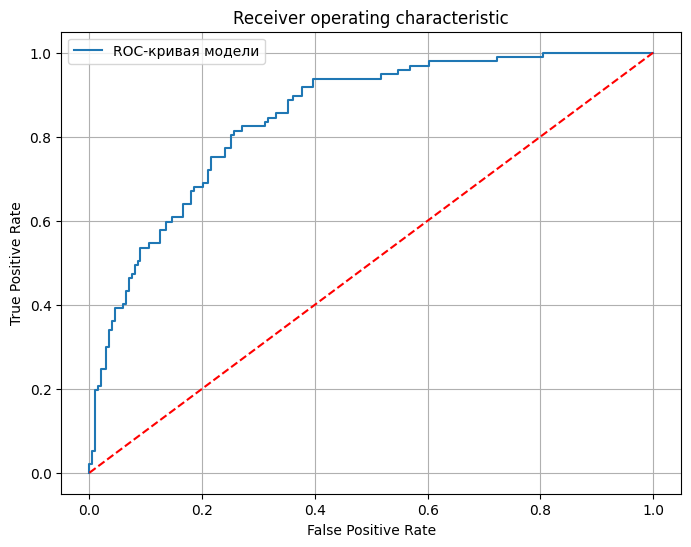

Площадь под графиком прямой = 0.847


In [453]:
#построение roc-кривой
y_pred_prob = logistic_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.title('Receiver operating characteristic')
plt.plot(fpr, tpr, label=f'ROC-кривая модели')
plt.plot([0, 1], [0, 1], 'k--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()
print(f"Площадь под графиком прямой = {np.round(roc_auc, 3)}")

Чем дальше кривая отклоняется от диагональной прямой (модель, случайно классифицирующая данные), тем выше качество модели.

Следует обратить внимание на параметр auc (площадь под графиком прямой), чем это число ближе к 1, тем точнее классификация. В нашем случае auc = 0.847, что сигнализирует о высоком качестве модели.